In [1]:
import pandas as pd
import numpy as np
import sys

from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data Analyst munnar Dataset.csv')
df

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654
...,...,...,...,...,...,...,...,...,...,...
69,The Fog Munnar (Resort & Spa),4.5,Excellent,292,5.0,Ettycity Road,city centre,13.2 km,"8,103","2,178"
70,Skylark Holidays | Rooms & Caretaker,4.1,Very Good,17,NaN,Chinnakanal,city centre,20.6 km,"3,317",684
71,Deshadan Mountain Resort- The highest resort i...,4.3,Excellent,395,4.0,Pallivasal,city centre,5.8 km,"3,953",808
72,Nature Zone Jungle Resort,4.1,Very Good,187,4.0,Pallivasal,city centre,6.6 km,"6,862","2,124"


In [3]:
print(type(df))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Hotel Name\t\t\t\t\t\t\t\t\t', 'Rating', 'Rating Description',
       'Reviews', 'Star Rating', 'Location', 'Nearest Landmark',
       'Distance to Landmark', 'Price', 'Tax'],
      dtype='object')


### Renaming Column names

In [4]:
df.rename(columns={'Hotel Name\t\t\t\t\t\t\t\t\t':'Hotel_Name',
                   'Rating Description':'Rating_Description',
                   'Star Rating':'Star_Rating',
                   'Nearest Landmark':'Nearest_Landmark',
                   'Distance to Landmark':'Distance_to_Landmark'}, inplace=True)
df.columns

Index(['Hotel_Name', 'Rating', 'Rating_Description', 'Reviews', 'Star_Rating',
       'Location', 'Nearest_Landmark', 'Distance_to_Landmark', 'Price', 'Tax'],
      dtype='object')

In [5]:
# using timeit to check time of overall checking info VS individual column checking info
start = timer()
df.info()
print(timer() - start)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel_Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating_Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star_Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest_Landmark      74 non-null     object 
 7   Distance_to_Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB
0.010375200072303414


In [6]:
start = timer()
print(df['Star_Rating'].isna().sum())   ### Note that there are 17 Nulls or no values
print(timer() - start)

17
0.0010068999836221337


In [7]:
sys.getsizeof(df)  #this will give the size of the DataFrame object itself, not the size of the data it contains.

36974

In [8]:
df.memory_usage().sum()  # This will give the total memory usage of the DataFrame's data in bytes

6048

In [9]:
df.nunique()

Hotel_Name              74
Rating                  18
Rating_Description       4
Reviews                 70
Star_Rating              4
Location                22
Nearest_Landmark         2
Distance_to_Landmark    57
Price                   72
Tax                     70
dtype: int64

### Changing datatypes

In [10]:
# converting 'm' into 'km' of Distance_to_Landmark column first
def get_dist_in_km(x):
    if x.split()[1]=='m':
        return float(x.split()[0])/1000
    elif x.split()[1]=='km':
        return x.split()[0]

df['Distance_to_Landmark'] = df['Distance_to_Landmark'].apply(get_dist_in_km)  
df.head()

,Hotel_Name,Rating,Rating_Description,Reviews,Star_Rating,Location,Nearest_Landmark,Distance_to_Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,0.95,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9,"3,203",654


In [11]:
df['Distance_to_Landmark']= df['Distance_to_Landmark'].astype('float64')
df['Distance_to_Landmark'].dtype

dtype('float64')

In [12]:
# removing comma from price column
df['Price']=df['Price'].apply(lambda x: x.replace(",",""))
df['Price']=df["Price"].astype('float64')
df['Price'].dtype

dtype('float64')

In [13]:
#we cant recognise by seeing why 'tax' column has object datatype 
# so direct apply astype ,it shows reason

# df['Tax']=df['Tax'].astype('float64')

In [14]:
# so some value  has comma not all so convert it into string first
df['Tax']=df['Tax'].apply(lambda x: str(x))

df['Tax']=df['Tax'].apply(lambda x: x.replace(",",""))
df['Tax']=df["Tax"].astype('float64')
df['Tax'].dtype

dtype('float64')

In [15]:
print(df.info())
print('----------------------')
print(sys.getsizeof(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel_Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating_Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star_Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest_Landmark      74 non-null     object 
 7   Distance_to_Landmark  74 non-null     float64
 8   Price                 74 non-null     float64
 9   Tax                   72 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.9+ KB
None
----------------------
24969


### Null/Missing value

In [16]:
# Star_rating column
df['Star_Rating'].isnull().sum()

17

In [17]:
# filling missing value with max frequency value of star rating
df['Star_Rating'].value_counts()

4.0    23
3.0    18
5.0    15
2.0     1
Name: Star_Rating, dtype: int64

In [18]:
df['Star_Rating']=df['Star_Rating'].fillna(df['Star_Rating'].value_counts().index[0])  # index[0] i.e null value filled with zeroth index position no ie 4
df['Star_Rating'].isnull().sum()

0

In [19]:
# Tax column
df['Tax'].isnull().sum()

2

In [20]:
# fillna with median
df['Tax'].fillna(df['Tax'].median(), inplace=True)
df['Tax'].isnull().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel_Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating_Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star_Rating           74 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest_Landmark      74 non-null     object 
 7   Distance_to_Landmark  74 non-null     float64
 8   Price                 74 non-null     float64
 9   Tax                   74 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.9+ KB


#### Styling the Dataframe

In [22]:
df.style      # same as df.head() just it shows whole dataset

,Hotel_Name,Rating,Rating_Description,Reviews,Star_Rating,Location,Nearest_Landmark,Distance_to_Landmark,Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4.000000,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4.000000,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3.000000,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4.000000,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4.000000,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4.000000,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4.000000,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3.000000,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4.000000,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5.000000,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


In [23]:
# Coloring Price colunm w.r.t Avg price
def my_map(x, avg):
    if x < avg:
        return 'color:' + 'yellow'
    else:
        return 'color:' + 'green'

avg= df['Price'].mean()
df[['Price']].style.applymap(lambda x: my_map(x, avg))

,Price
0,2728.000000
1,4451.000000
2,2758.000000
3,2675.000000
4,3203.000000
5,3145.000000
6,3493.000000
7,2255.000000
8,2595.000000
9,5583.000000


In [24]:
# Highlight max and min element along with axis we choose..by default its zero ie along colunm axis..argument for highl_max is axis=1, 
df.style.highlight_max(color= 'red').highlight_min(color= 'yellow')  # for categorical column it follow alphabetic order 
                                                                     #i.e it max value is  'z' and me is 'a'

,Hotel_Name,Rating,Rating_Description,Reviews,Star_Rating,Location,Nearest_Landmark,Distance_to_Landmark,Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4.000000,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4.000000,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3.000000,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4.000000,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4.000000,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4.000000,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4.000000,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3.000000,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4.000000,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5.000000,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


In [25]:
#for identifying highest and lowest value in columns
df.style.background_gradient(cmap= 'Reds')       #high value=dark shade

,Hotel_Name,Rating,Rating_Description,Reviews,Star_Rating,Location,Nearest_Landmark,Distance_to_Landmark,Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4.000000,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4.000000,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3.000000,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4.000000,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4.000000,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4.000000,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4.000000,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3.000000,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4.000000,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5.000000,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


In [26]:
df[['Price', 'Tax', 'Rating', 'Reviews']].style.bar()    #It creates a styled representation where the values are visualized using a bar chart. 
                                                         #This can be helpful for quickly identifying the relative magnitudes of values within each column

,Price,Tax,Rating,Reviews
0,2728.000000,574.000000,4.100000,1058
1,4451.000000,969.000000,3.800000,1088
2,2758.000000,684.000000,4.100000,322
3,2675.000000,756.000000,4.300000,1337
4,3203.000000,654.000000,4.300000,1058
5,3145.000000,848.000000,4.200000,1934
6,3493.000000,713.000000,3.900000,437
7,2255.000000,554.000000,3.700000,6
8,2595.000000,530.000000,4.000000,599
9,5583.000000,1141.000000,4.100000,249


In [27]:
#with different different color
df[['Price', 'Rating', 'Tax', 'Reviews']].style.bar(subset =['Price'], color= 'red').bar(subset =['Rating'], color = 'blue').bar(subset =['Tax'], color = 'green').bar(subset =['Reviews'], color = 'pink')

,Price,Rating,Tax,Reviews
0,2728.000000,4.100000,574.000000,1058
1,4451.000000,3.800000,969.000000,1088
2,2758.000000,4.100000,684.000000,322
3,2675.000000,4.300000,756.000000,1337
4,3203.000000,4.300000,654.000000,1058
5,3145.000000,4.200000,848.000000,1934
6,3493.000000,3.900000,713.000000,437
7,2255.000000,3.700000,554.000000,6
8,2595.000000,4.000000,530.000000,599
9,5583.000000,4.100000,1141.000000,249


### Visualization

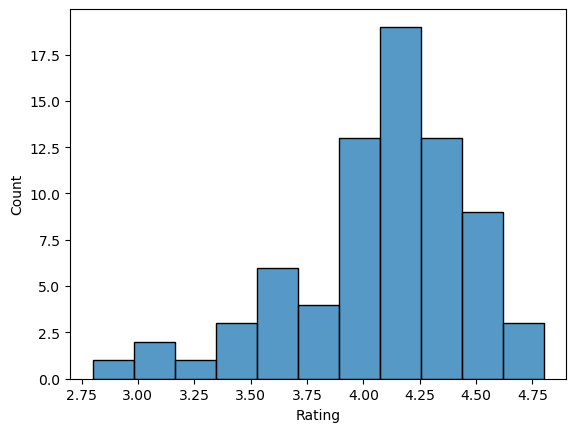

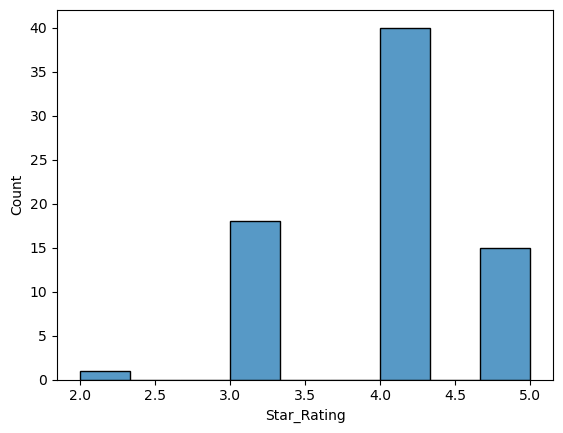

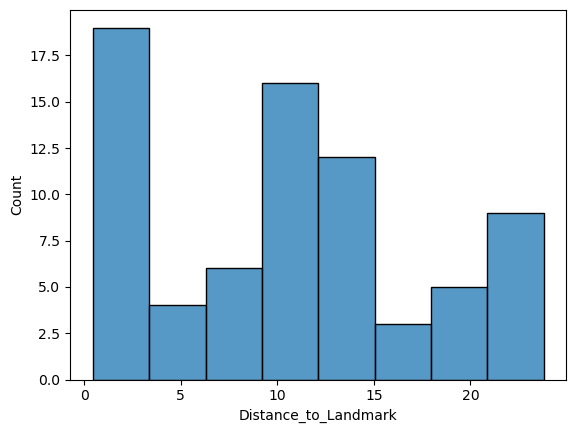

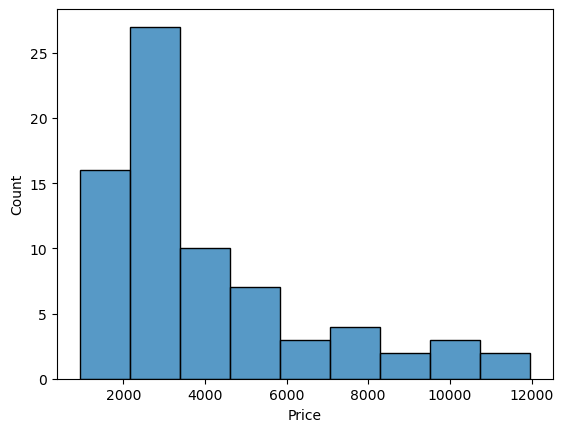

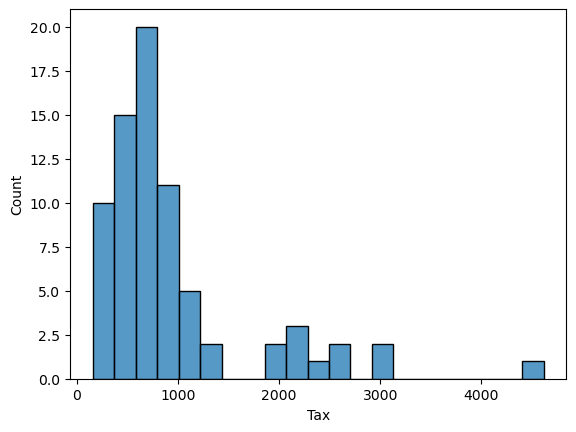

In [28]:
# Histplot
for j,i in enumerate(df.columns):     # create a distribution plot (distplot) for each column in a Pandas DataFrame .
    if df[i].dtype == 'float':          # where the column has a data type of 'float'
        plt.figure(j)                   # i represents the column name, and j represents its index.
        sns.histplot(df[i], kde= False)

<Axes: >

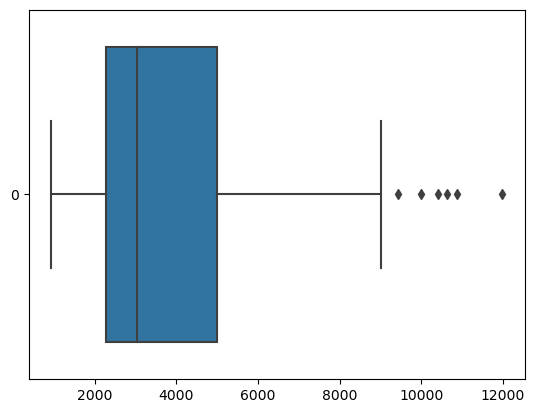

In [29]:
# Box plots
sns.boxplot(df['Price'], orient = 'h')

<Axes: xlabel='Rating'>

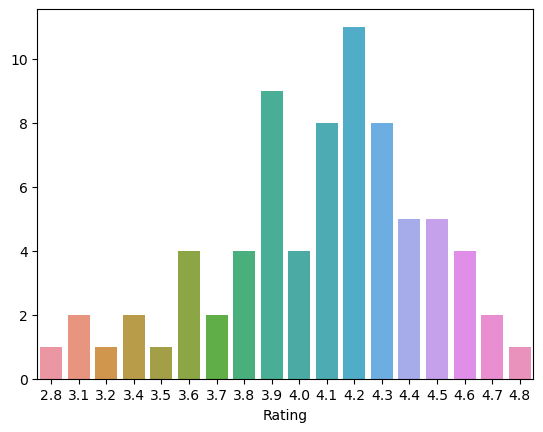

In [30]:
fig_x_y= df.groupby('Rating')['Rating'].count()
sns.barplot(x= fig_x_y.index, y= fig_x_y.values)

<Axes: xlabel='Rating_Description'>

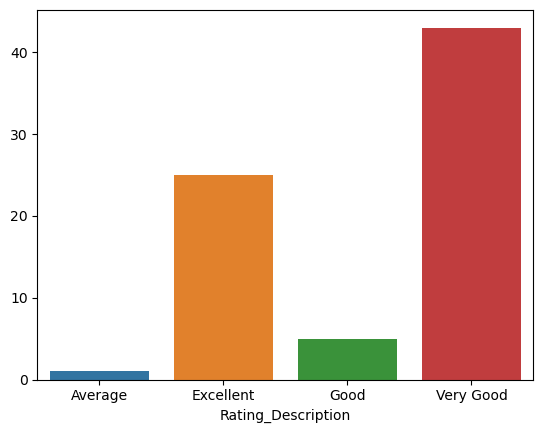

In [32]:
fig_x_y= df.groupby('Rating_Description')['Rating_Description'].count()
sns.barplot(x= fig_x_y.index, y=fig_x_y.values)

In [33]:
rating_desc= df['Rating_Description'].unique()
def rating_to_nums(i):
    if i == 'Good':
        return 1
    elif i =='Average':
        return 0
    elif i =='Very Good':
        return 2
    elif i =='Excellent':
        return 3


<Axes: xlabel='Rating_Description_numeric'>

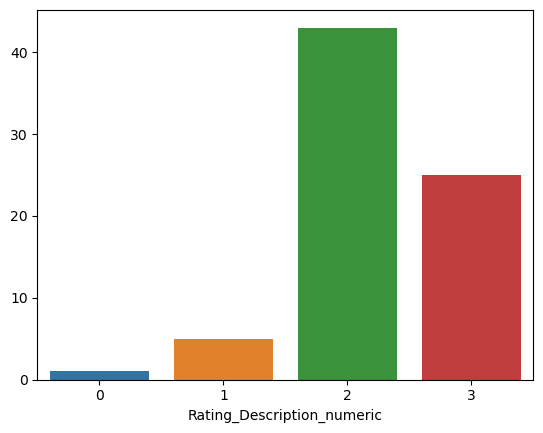

In [34]:
import seaborn as sns
df['Rating_Description_numeric']= df['Rating_Description'].apply(lambda x: rating_to_nums(x))
fig_x_y= df.groupby('Rating_Description_numeric')['Rating_Description_numeric'].count()
sns.barplot(x= fig_x_y.index, y=fig_x_y.values)

In [35]:
df['Rating_Description'].apply(lambda x: rating_to_nums(x))

0     2
1     2
2     2
3     3
4     3
     ..
69    3
70    2
71    3
72    2
73    1
Name: Rating_Description, Length: 74, dtype: int64

In [36]:
df['Rating_Description']

0     Very Good
1     Very Good
2     Very Good
3     Excellent
4     Excellent
        ...    
69    Excellent
70    Very Good
71    Excellent
72    Very Good
73         Good
Name: Rating_Description, Length: 74, dtype: object

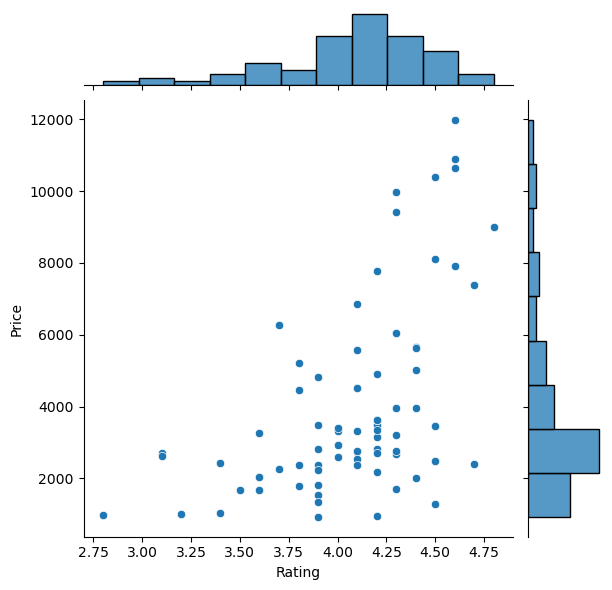

In [37]:
sns.jointplot(x= df['Rating'], y = df['Price'])

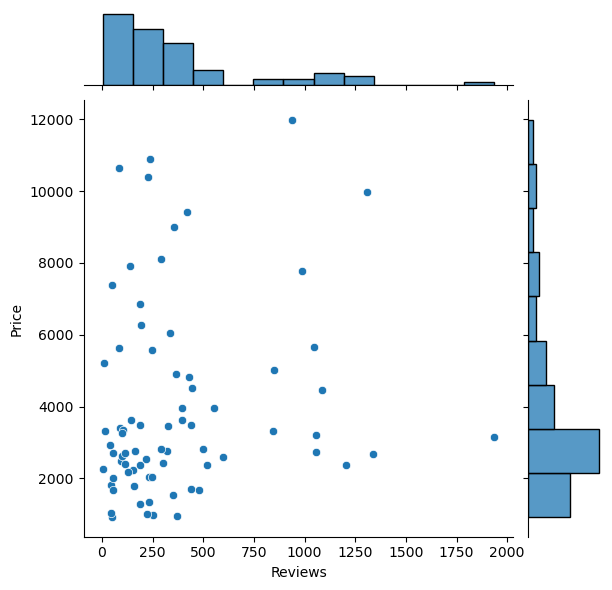

In [38]:
sns.jointplot(x= df['Reviews'], y = df['Price'])

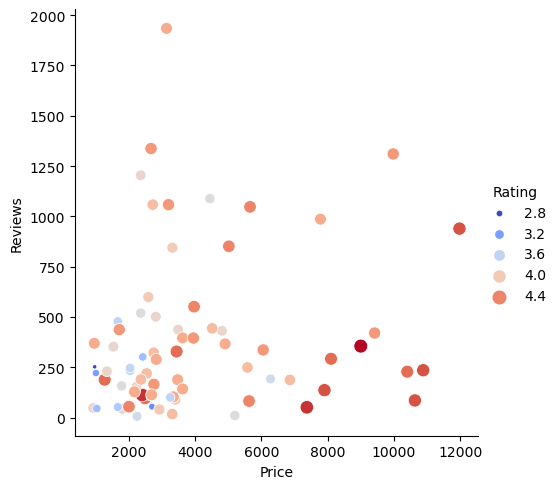

In [39]:
# 3D plots using hues
sns.relplot(
    data=df,
    x='Price', y= 'Reviews',
    size='Rating', sizes=(10, 100),
    hue='Rating',
    palette='coolwarm',
);

<Axes: xlabel='Price', ylabel='Rating_Description'>

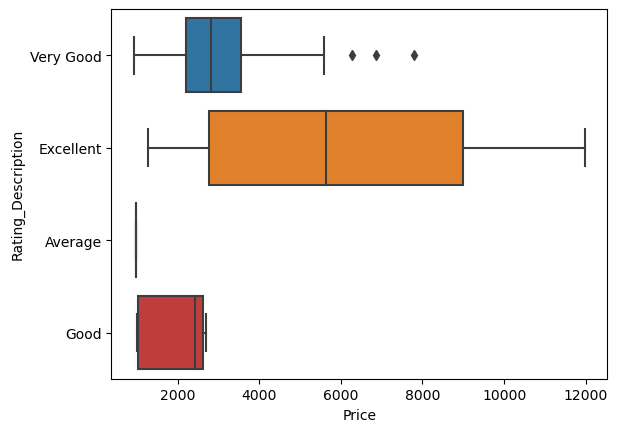

In [41]:
sns.boxplot(x= 'Price', y = 'Rating_Description', data = df) #2D box plots

<Axes: xlabel='Price', ylabel='Rating_Description'>

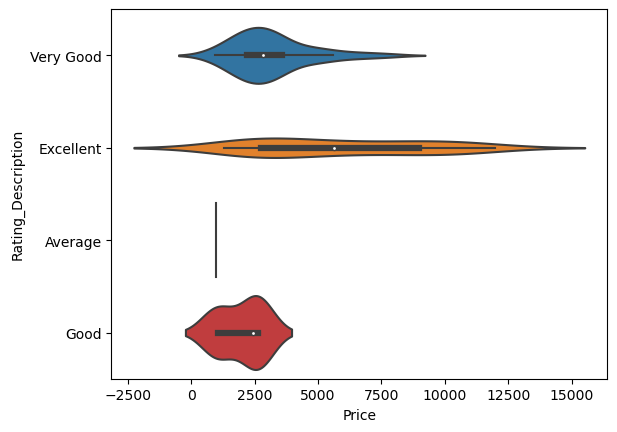

In [42]:
sns.violinplot(x= 'Price', y = 'Rating_Description', data = df) #2D violin plots

<Axes: xlabel='Price', ylabel='Rating_Description'>

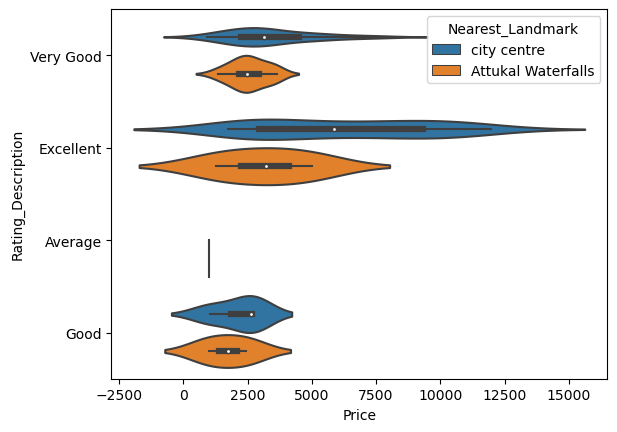

In [45]:
sns.violinplot(x= 'Price', y = 'Rating_Description', data = df, hue = 'Nearest_Landmark')

<Axes: xlabel='Price', ylabel='Rating_Description'>

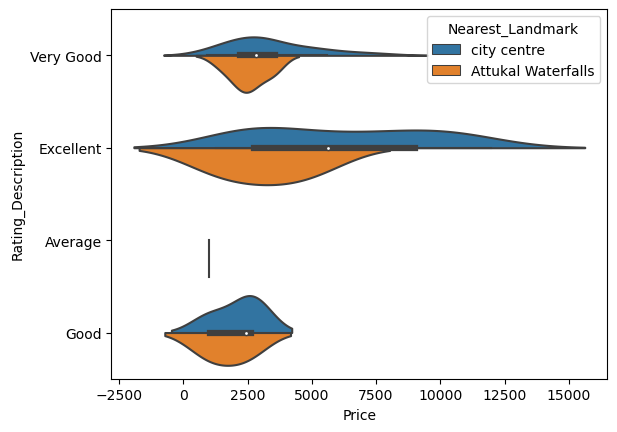

In [46]:
sns.violinplot(x= 'Price', y = 'Rating_Description', data = df, hue = 'Nearest_Landmark', split = True) #3D violin plots

In [48]:
# Pie charts (Data composition)
df['Rating_Description']

0     Very Good
1     Very Good
2     Very Good
3     Excellent
4     Excellent
        ...    
69    Excellent
70    Very Good
71    Excellent
72    Very Good
73         Good
Name: Rating_Description, Length: 74, dtype: object

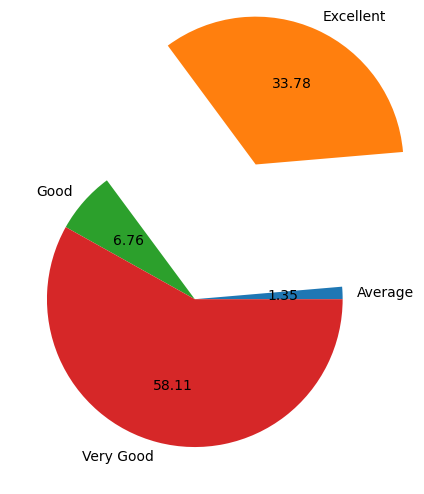

In [50]:
fig_x_y= df.groupby('Rating_Description')['Rating_Description'].count()
plt.pie(fig_x_y, labels= fig_x_y.index, autopct = '%.2f', explode = [0,1,0,0])
plt.show()

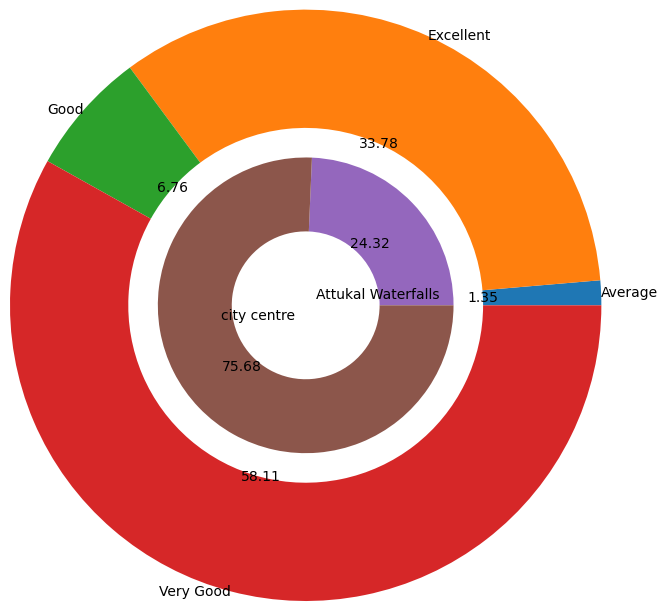

In [51]:
fig_x_y_lm= df.groupby('Nearest_Landmark')['Nearest_Landmark'].count()


plt.pie(fig_x_y, labels= fig_x_y.index, autopct = '%.2f', wedgeprops= {'width': 0.8}, radius = 2, labeldistance= 1)
plt.pie(fig_x_y_lm, labels= fig_x_y_lm.index, autopct = '%.2f', wedgeprops= {'width': 0.5}, radius = 1, labeldistance= 0.1)
plt.show()

<Axes: xlabel='Price', ylabel='Tax'>

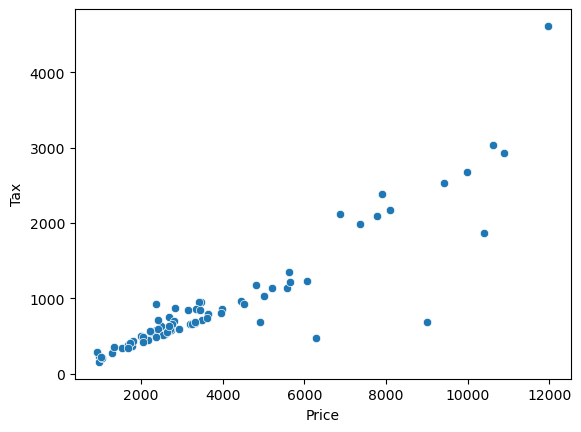

In [52]:
# Scatterplot
sns.scatterplot(x= 'Price', y= 'Tax', data = df)

In [53]:
df[df['Hotel_Name'] == "Nature Zone Jungle Resort"]

,Hotel_Name,Rating,Rating_Description,Reviews,Star_Rating,Location,Nearest_Landmark,Distance_to_Landmark,Price,Tax,Rating_Description_numeric
72,Nature Zone Jungle Resort,4.1,Very Good,187,4.0,Pallivasal,city centre,6.6,6862.0,2124.0,2


In [54]:
def dist_check(x):
    if x <= 6:
        return "Very Near (0 Km - 6 Km]"
    elif x <= 12:
        return "Near (6 Km - 12 Km]"
    elif x <= 20:
        return "Far (12 Km - 20 Km]"
    else:
        return "Too Far"
def rating_check(x):
    if x >= 4.1:
        return "Better Ratings"
    else:
        return "Worser Ratings"


<Axes: xlabel='Price', ylabel='Nearness_to_landmark'>

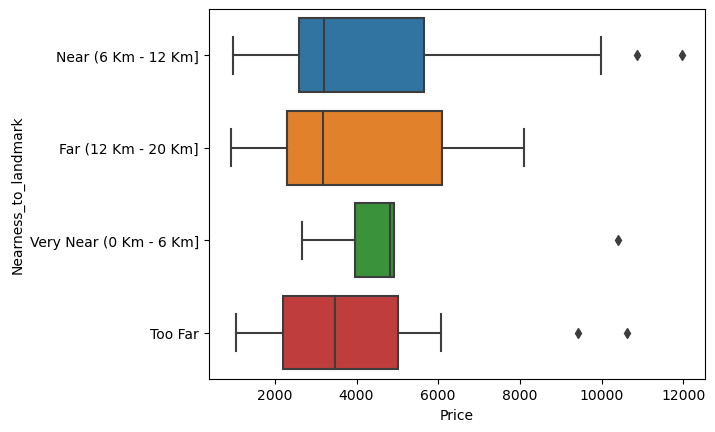

In [55]:
df['Nearness_to_landmark']= df['Distance_to_Landmark'].apply(lambda x: dist_check(x))
sns.boxplot(x= 'Price', y= 'Nearness_to_landmark', data = df[df['Nearest_Landmark']== "city centre"])


<Axes: xlabel='Price', ylabel='Nearness_to_landmark'>

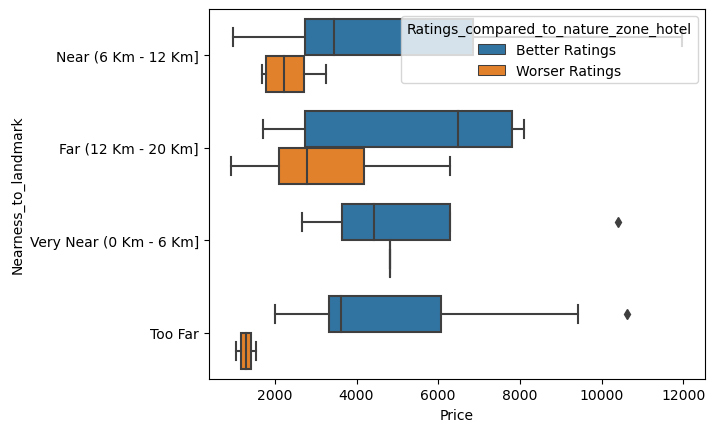

In [56]:
df['Ratings_compared_to_nature_zone_hotel']= df['Rating'].apply(lambda x: rating_check(x))
sns.boxplot(x= 'Price', y= 'Nearness_to_landmark', data = df[df['Nearest_Landmark']== "city centre"], hue = 'Ratings_compared_to_nature_zone_hotel')